<a href="https://colab.research.google.com/github/nayan8141/Mini-Project---Digit-Recognizer/blob/master/MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


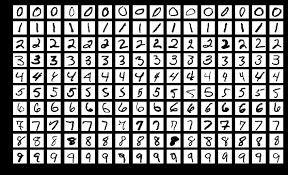

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train[600]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
x_train[34].shape

(28, 28)

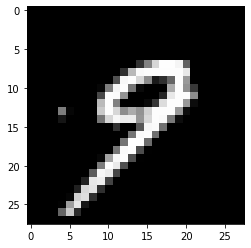

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[487],cmap='gray')
plt.show()

In [7]:
x_train[34].min()

0

In [8]:
x_train[34].max()

255

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation ='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

In [10]:
history = model.fit(x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.6773 - accuracy: 0.9070
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3550 - accuracy: 0.9394
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3099 - accuracy: 0.9412
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2797 - accuracy: 0.9451
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2519 - accuracy: 0.9495


In [11]:
y_pred = model.predict_classes(x_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [12]:
y_pred[0]

7

In [13]:
import numpy as np
np.argmax(y_pred[0])

0

In [14]:
np.argmax(model.predict(x_test), axis=-1)

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
# Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9481

In [16]:
confusion_matrix(y_pred,y_test)

array([[ 963,    0,    9,    1,    1,    6,   12,    1,    6,    9],
       [   1, 1118,   10,    1,    2,    4,    4,    8,   17,    7],
       [   1,    3,  963,    7,    2,    0,    0,   14,    8,    1],
       [   2,    1,   13,  960,    0,   21,    1,    8,    9,   10],
       [   0,    0,    6,    0,  950,    0,    6,    6,    9,   21],
       [   0,    1,    1,   11,    2,  824,    2,    1,   23,    8],
       [   6,    1,    3,    0,    6,   14,  929,    1,   13,    0],
       [   3,    0,   14,   13,    4,    3,    0,  980,    8,   19],
       [   4,   11,   11,   13,    8,   16,    4,    2,  868,    8],
       [   0,    0,    2,    4,    7,    4,    0,    7,   13,  926]])

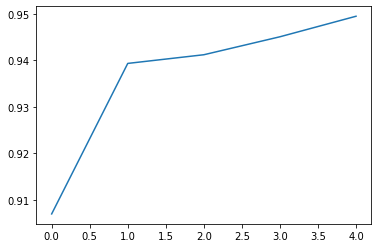

In [17]:
plt.plot(history.history['accuracy'])

In [18]:
model.get_weights()

[array([[-0.03488362,  0.0208308 , -0.02673443, ..., -0.05295567,
         -0.06700197, -0.00871611],
        [-0.01454593,  0.06188649, -0.03452081, ...,  0.06151916,
          0.03247315, -0.04706113],
        [-0.00945697,  0.04976151,  0.01585203, ..., -0.02622727,
          0.05650609,  0.05953699],
        ...,
        [ 0.0055671 ,  0.04848231,  0.04527985, ...,  0.02085488,
         -0.02640653,  0.00327373],
        [-0.00894024,  0.00637197,  0.01398642, ...,  0.04712965,
         -0.01602126, -0.00485891],
        [-0.05947087,  0.04726551,  0.00353087, ..., -0.03673655,
          0.01680496, -0.03531168]], dtype=float32),
 array([-0.0789663 , -0.0518766 , -0.05636054, -0.04807736, -0.00861814,
        -0.01711529, -0.00957375, -0.05098601, -0.02757932, -0.04687493,
        -0.03677924, -0.0221403 , -0.03699991, -0.02706512, -0.04034017,
        -0.02666075, -0.02261116, -0.02060823, -0.02139752, -0.02386939,
        -0.01900481, -0.02898871, -0.06127267, -0.02322351, -0.051

In [19]:
model.save('model.h5')